<a href="https://colab.research.google.com/github/KavyaGarapati/HOMEWORK-1/blob/master/PROBLEM_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [0]:
import numpy as np
np.random.seed(42)

xs = 2 * np.random.rand(100, 1)
ys = 4 + 3 * xs + np.random.rand(100, 1)

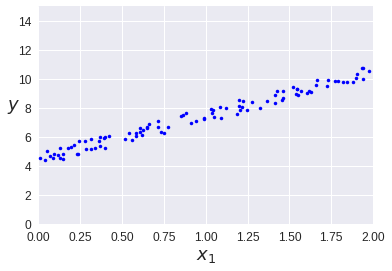

In [0]:
plt.plot(xs, ys, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [0]:
# train set
train_xs = xs[:80]
train_ys = ys[:80]
# test set
test_xs = xs[80:]
test_ys = ys[80:]


In [0]:
from keras import models
from keras import layers

Using TensorFlow backend.


In [0]:
network = models.Sequential()

In [0]:
network.add(layers.Dense(1, input_shape=(1,)))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
network.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [0]:
network.fit(train_xs, train_ys, epochs=10, batch_size=8)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
80/80 [==============================] - 3s 33ms/step - loss: nan - acc: 0.0000e+00
Epoch 2/10
80/80 [==============================] - 0s 277us/step - loss: nan - acc: 0.0000e+00
Epoch 3/10
80/80 [==============================] - 0s 283us/step - loss: nan - acc: 0.0000e+00
Epoch 4/10
80/80 [==============================] - 0s 291us/step - loss: nan - acc: 0.0000e+00
Epoch 5/10
80/80 [==============================] - 0s 346us/step - loss: nan - acc: 0.0000e+00
Epoch 6/10
80/80 [==============================] - 0s 314us/step - loss: nan - acc: 0.0000e+00
Epoch 7/10
80/80 [==============================] - 0s 293us/step - loss: nan - acc: 0.0000e+00
Epoch 8/10
80/80 [==============================] - 0s 306us/step - loss: nan - acc: 0.0000e+00
Epoch 9/10
80/80 [==============================] - 0s 284us/step - loss: nan - acc: 0.0000e+00
Epoch 10/10
80/80 [==============================] - 0s 298us/step - loss: nan - acc: 0.0

In [0]:
test_loss, test_acc = network.evaluate(test_xs, test_ys)

20/20 [==============================] - 0s 1ms/step


In [0]:
test_acc

0.0

In [0]:
test_loss

nan

In [0]:
pred_ys = network.predict(test_xs)

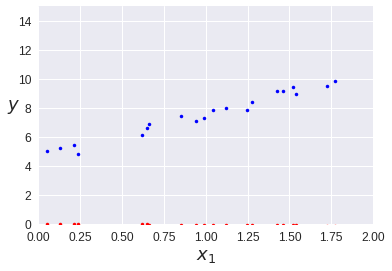

In [0]:
plt.plot(test_xs, test_ys, "b.")
plt.plot(test_xs, pred_ys, "r.") 
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [0]:
from keras.datasets import mnist

(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 9s 1us/step


In [0]:
train_images = train_images_original.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images_original.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [0]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels_original)
test_labels = to_categorical(test_labels_original)

In [0]:
train_images.shape

(60000, 784)

In [0]:
train_images_original.shape

(60000, 28, 28)

In [0]:
import matplotlib.pyplot as plt
plt.imshow(train_images_original[4])
plt.grid(None)
plt.show()

In [0]:
train_labels.shape

(60000, 10)

In [0]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [0]:
import numpy as np

In [0]:
np.argmax(train_labels[0])

5

In [0]:
train_labels_original[0]

5

In [0]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
network.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [0]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [0]:
epochs = 10
history = network.fit(train_images, 
                      train_labels, 
                      epochs=epochs, 
                      batch_size=128, 
                      validation_data=(test_images, test_labels))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.2566 - acc: 0.9260 - val_loss: 0.1244 - val_acc: 0.9614
Epoch 2/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.1033 - acc: 0.9695 - val_loss: 0.0844 - val_acc: 0.9750
Epoch 3/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.0686 - acc: 0.9799 - val_loss: 0.0745 - val_acc: 0.9751
Epoch 4/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.0494 - acc: 0.9849 - val_loss: 0.0682 - val_acc: 0.9795
Epoch 5/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.0368 - acc: 0.9896 - val_loss: 0.0713 - val_acc: 0.9796
Epoch 6/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.0280 - acc: 0.9917 - val_loss: 0.0706 - val_acc: 0.9800
Epoch 7/10
60000/60000 [==============================] - 2s 34us/step - loss: 0

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)

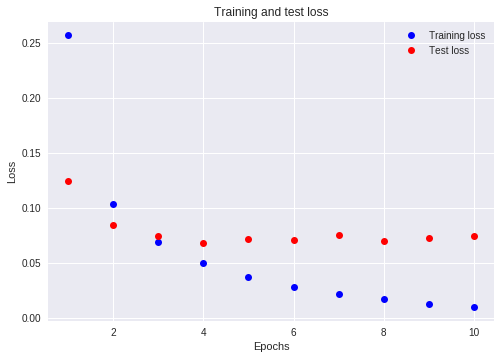

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()